# Importing the required libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import KFold
from sklearn.metrics import mean_squared_error, r2_score
import warnings
warnings.filterwarnings("ignore")

# Reading the file

In [2]:
df = pd.read_csv("C:\\Users\\lavanya\\Downloads\\81 column dataset.csv")
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


# Performing EDA

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [4]:
df.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [5]:
df = df.drop("Id",axis=1)

In [6]:
df.shape

(1460, 80)

In [7]:
df_n = df.select_dtypes(include=['number'])
df_n

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
0,60,65.0,8450,7,5,2003,2003,196.0,706,0,...,0,61,0,0,0,0,0,2,2008,208500
1,20,80.0,9600,6,8,1976,1976,0.0,978,0,...,298,0,0,0,0,0,0,5,2007,181500
2,60,68.0,11250,7,5,2001,2002,162.0,486,0,...,0,42,0,0,0,0,0,9,2008,223500
3,70,60.0,9550,7,5,1915,1970,0.0,216,0,...,0,35,272,0,0,0,0,2,2006,140000
4,60,84.0,14260,8,5,2000,2000,350.0,655,0,...,192,84,0,0,0,0,0,12,2008,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,60,62.0,7917,6,5,1999,2000,0.0,0,0,...,0,40,0,0,0,0,0,8,2007,175000
1456,20,85.0,13175,6,6,1978,1988,119.0,790,163,...,349,0,0,0,0,0,0,2,2010,210000
1457,70,66.0,9042,7,9,1941,2006,0.0,275,0,...,0,60,0,0,0,0,2500,5,2010,266500
1458,20,68.0,9717,5,6,1950,1996,0.0,49,1029,...,366,0,112,0,0,0,0,4,2010,142125


In [8]:
df_c = df.select_dtypes(include=['object'])
df_c

,MSZoning,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,...,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,PoolQC,Fence,MiscFeature,SaleType,SaleCondition
0,RL,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,...,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal
1,RL,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,...,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal
2,RL,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,...,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal
3,RL,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,...,Detchd,Unf,TA,TA,Y,NaN,NaN,NaN,WD,Abnorml
4,RL,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,...,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,RL,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,...,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal
1456,RL,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NWAmes,Norm,...,Attchd,Unf,TA,TA,Y,NaN,MnPrv,NaN,WD,Normal
1457,RL,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Crawfor,Norm,...,Attchd,RFn,TA,TA,Y,NaN,GdPrv,Shed,WD,Normal
1458,RL,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,...,Attchd,Unf,TA,TA,Y,NaN,NaN,NaN,WD,Normal


In [9]:
df_n.isnull().sum()


MSSubClass         0
LotFrontage      259
LotArea            0
OverallQual        0
OverallCond        0
YearBuilt          0
YearRemodAdd       0
MasVnrArea         8
BsmtFinSF1         0
BsmtFinSF2         0
BsmtUnfSF          0
TotalBsmtSF        0
1stFlrSF           0
2ndFlrSF           0
LowQualFinSF       0
GrLivArea          0
BsmtFullBath       0
BsmtHalfBath       0
FullBath           0
HalfBath           0
BedroomAbvGr       0
KitchenAbvGr       0
TotRmsAbvGrd       0
Fireplaces         0
GarageYrBlt       81
GarageCars         0
GarageArea         0
WoodDeckSF         0
OpenPorchSF        0
EnclosedPorch      0
3SsnPorch          0
ScreenPorch        0
PoolArea           0
MiscVal            0
MoSold             0
YrSold             0
SalePrice          0
dtype: int64

In [10]:
m_l = df_n["LotFrontage"].median()
df_n["LotFrontage"] = df_n["LotFrontage"].fillna(m_l)
m_m = df_n["MasVnrArea"].median()
df_n["MasVnrArea"] = df_n["MasVnrArea"].fillna(m_m)
df_n["MasVnrArea"].isnull().sum()

0

In [11]:
m_g = df_n["GarageYrBlt"].median()
df_n["GarageYrBlt"] = df_n["GarageYrBlt"].fillna(m_g)
df_n["GarageYrBlt"].isnull().sum()

0

In [12]:
df_n.isnull().sum().sum()

0

In [13]:
df_c.isnull().sum()

MSZoning            0
Street              0
Alley            1369
LotShape            0
LandContour         0
Utilities           0
LotConfig           0
LandSlope           0
Neighborhood        0
Condition1          0
Condition2          0
BldgType            0
HouseStyle          0
RoofStyle           0
RoofMatl            0
Exterior1st         0
Exterior2nd         0
MasVnrType        872
ExterQual           0
ExterCond           0
Foundation          0
BsmtQual           37
BsmtCond           37
BsmtExposure       38
BsmtFinType1       37
BsmtFinType2       38
Heating             0
HeatingQC           0
CentralAir          0
Electrical          1
KitchenQual         0
Functional          0
FireplaceQu       690
GarageType         81
GarageFinish       81
GarageQual         81
GarageCond         81
PavedDrive          0
PoolQC           1453
Fence            1179
MiscFeature      1406
SaleType            0
SaleCondition       0
dtype: int64

In [14]:
df_c.columns[df_c.isnull().any()]

Index(['Alley', 'MasVnrType', 'BsmtQual', 'BsmtCond', 'BsmtExposure',
       'BsmtFinType1', 'BsmtFinType2', 'Electrical', 'FireplaceQu',
       'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond', 'PoolQC',
       'Fence', 'MiscFeature'],
      dtype='object')

In [15]:
modes = df_c.mode().iloc[0]
df_c = df_c.fillna(modes)
df_c

,MSZoning,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,...,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,PoolQC,Fence,MiscFeature,SaleType,SaleCondition
0,RL,Pave,Grvl,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,...,Attchd,RFn,TA,TA,Y,Gd,MnPrv,Shed,WD,Normal
1,RL,Pave,Grvl,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,...,Attchd,RFn,TA,TA,Y,Gd,MnPrv,Shed,WD,Normal
2,RL,Pave,Grvl,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,...,Attchd,RFn,TA,TA,Y,Gd,MnPrv,Shed,WD,Normal
3,RL,Pave,Grvl,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,...,Detchd,Unf,TA,TA,Y,Gd,MnPrv,Shed,WD,Abnorml
4,RL,Pave,Grvl,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,...,Attchd,RFn,TA,TA,Y,Gd,MnPrv,Shed,WD,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,RL,Pave,Grvl,Reg,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,...,Attchd,RFn,TA,TA,Y,Gd,MnPrv,Shed,WD,Normal
1456,RL,Pave,Grvl,Reg,Lvl,AllPub,Inside,Gtl,NWAmes,Norm,...,Attchd,Unf,TA,TA,Y,Gd,MnPrv,Shed,WD,Normal
1457,RL,Pave,Grvl,Reg,Lvl,AllPub,Inside,Gtl,Crawfor,Norm,...,Attchd,RFn,TA,TA,Y,Gd,GdPrv,Shed,WD,Normal
1458,RL,Pave,Grvl,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,...,Attchd,Unf,TA,TA,Y,Gd,MnPrv,Shed,WD,Normal


In [16]:
df_c.isnull().sum().sum()

0

# Checking for outliers using boxplot

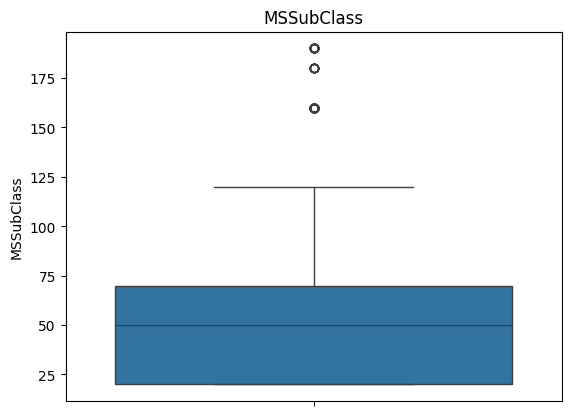

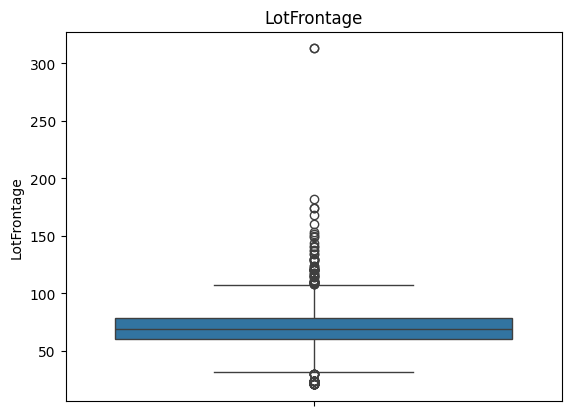

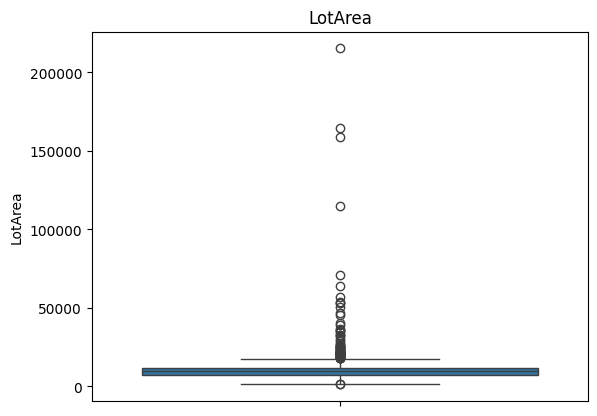

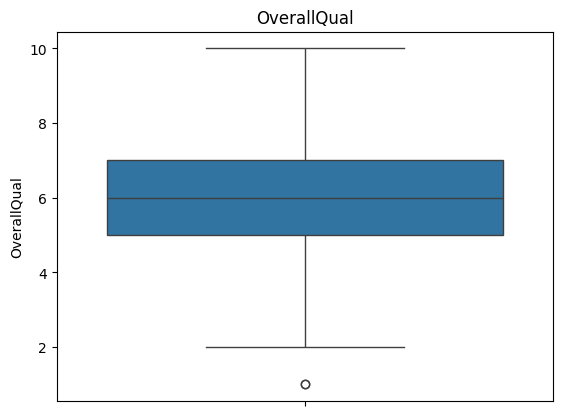

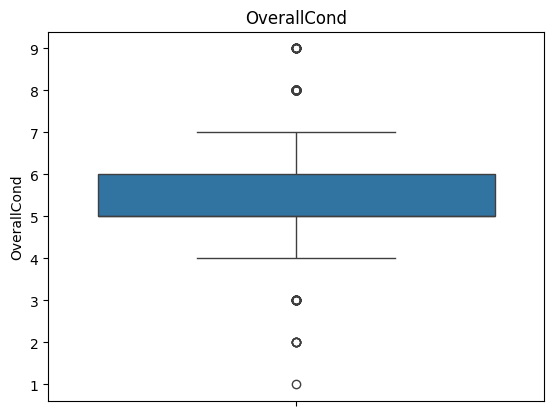

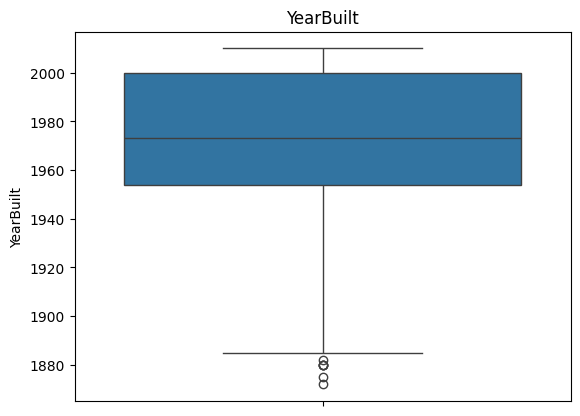

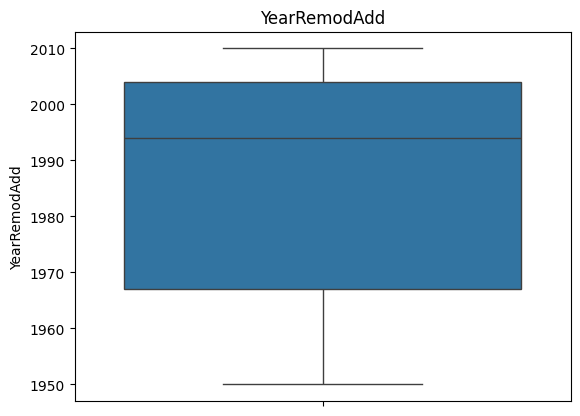

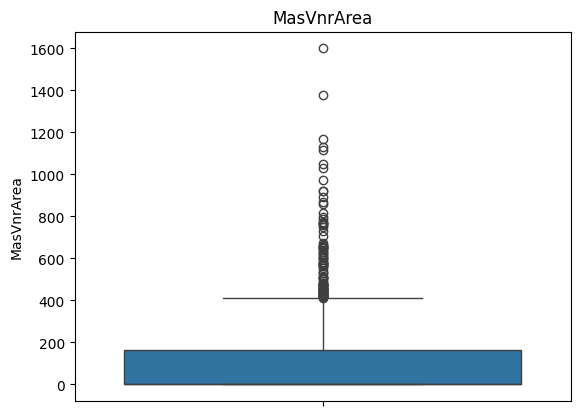

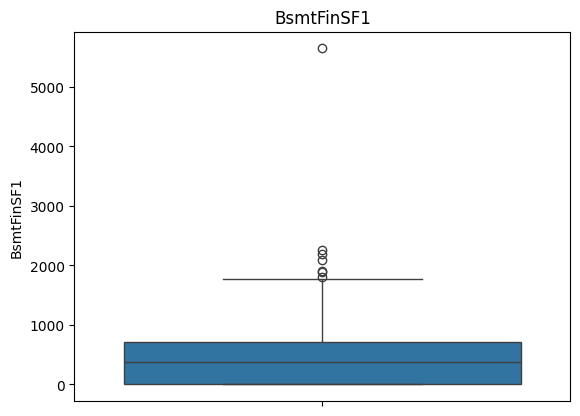

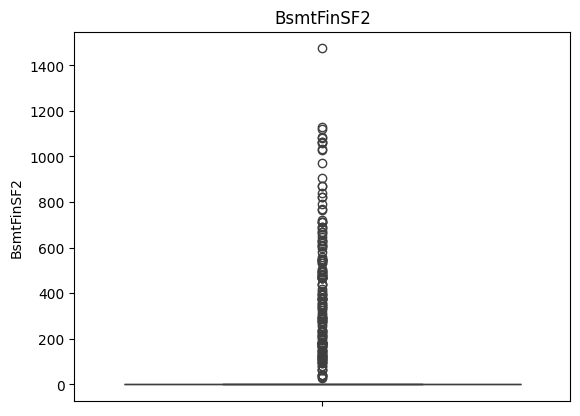

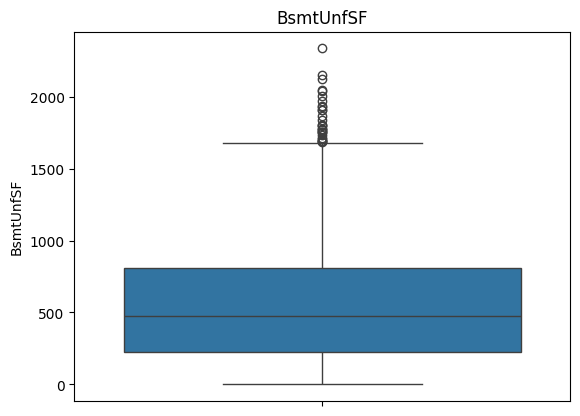

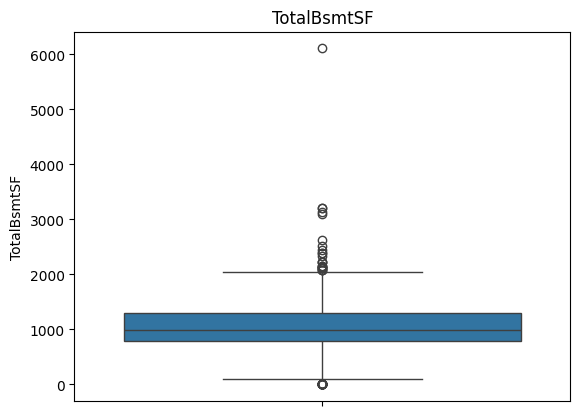

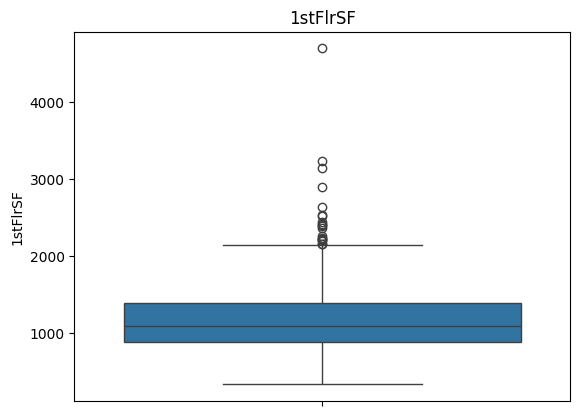

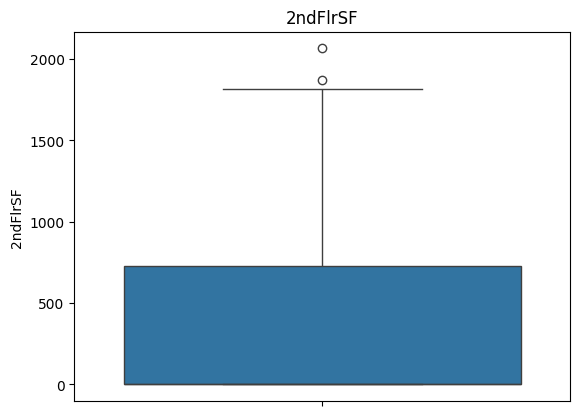

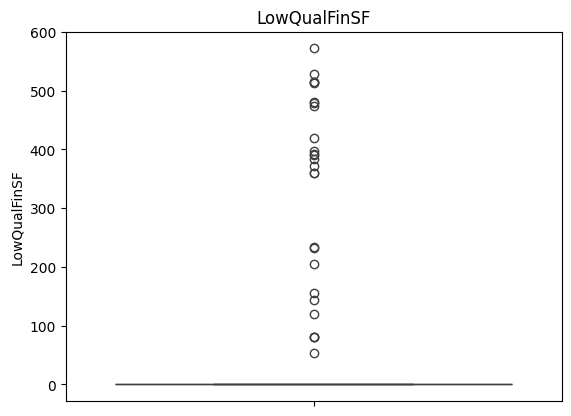

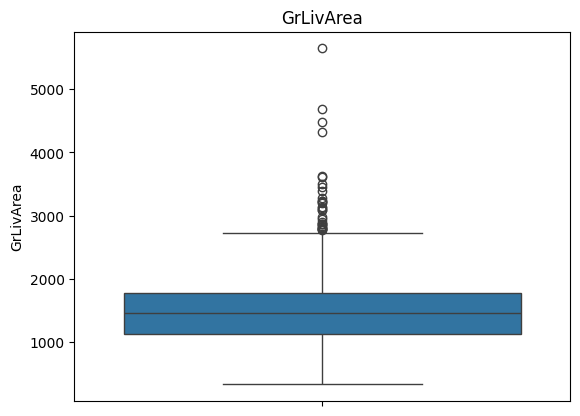

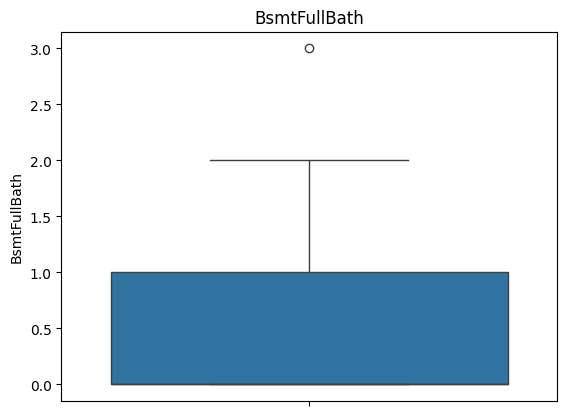

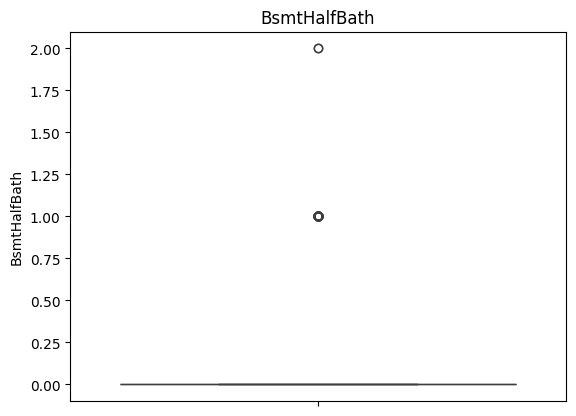

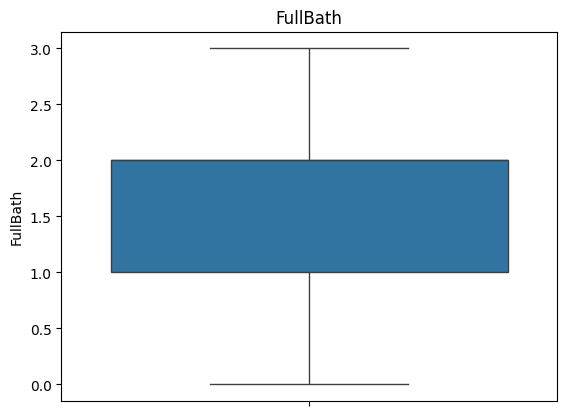

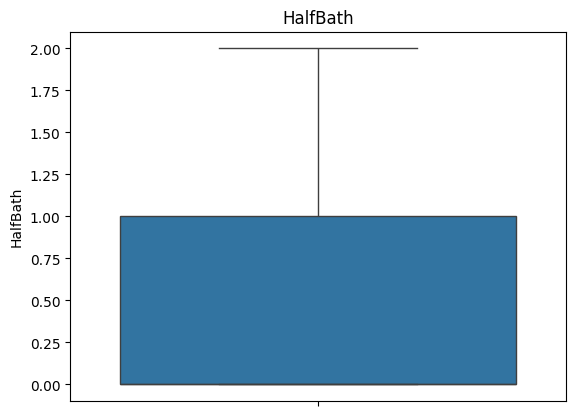

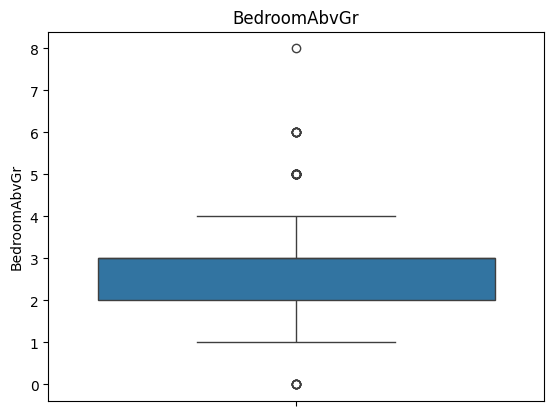

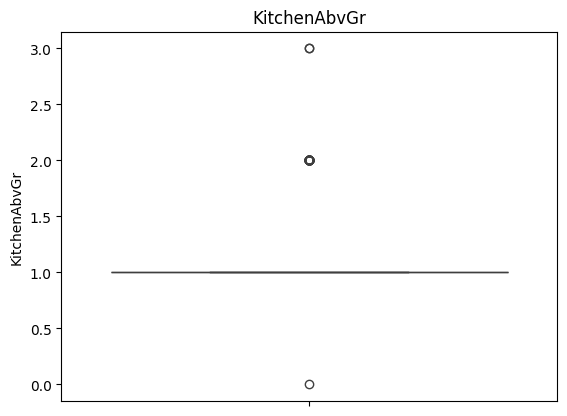

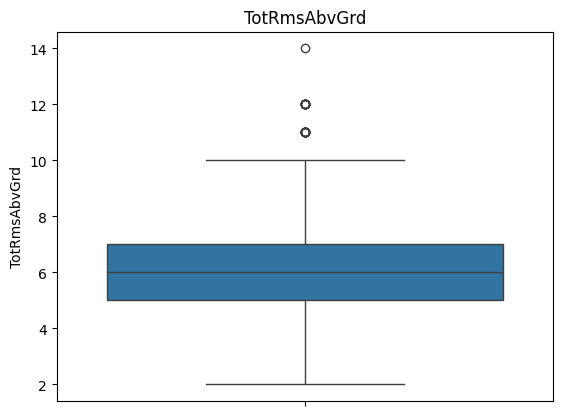

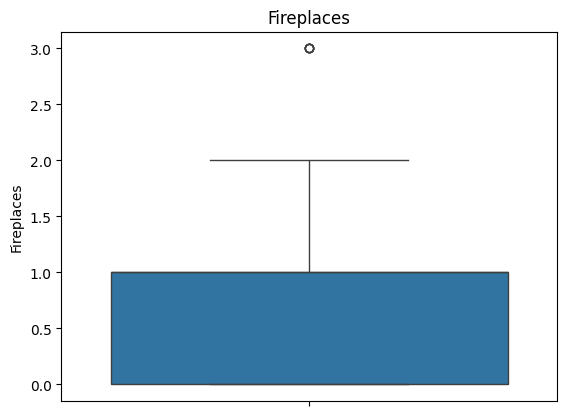

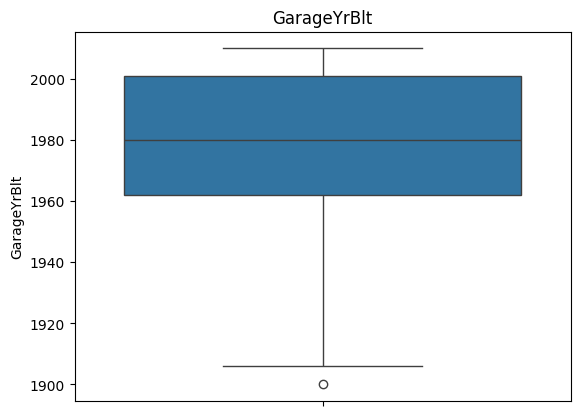

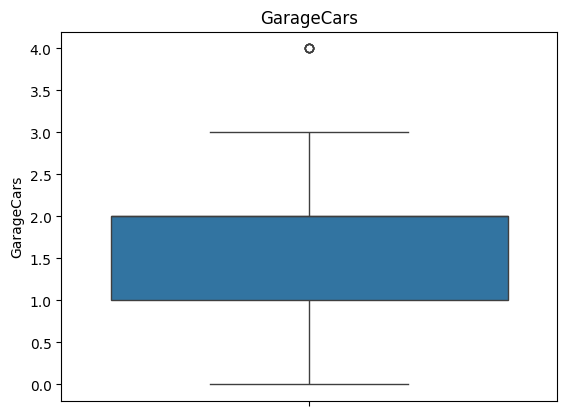

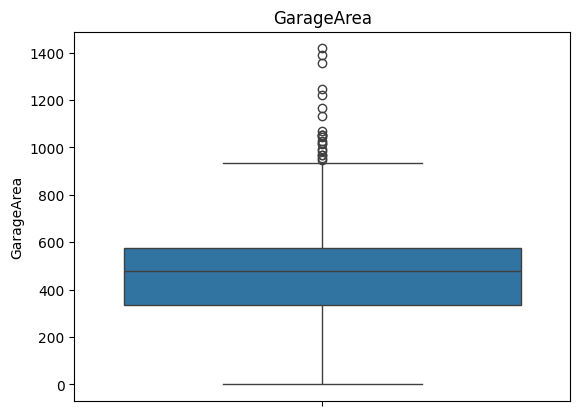

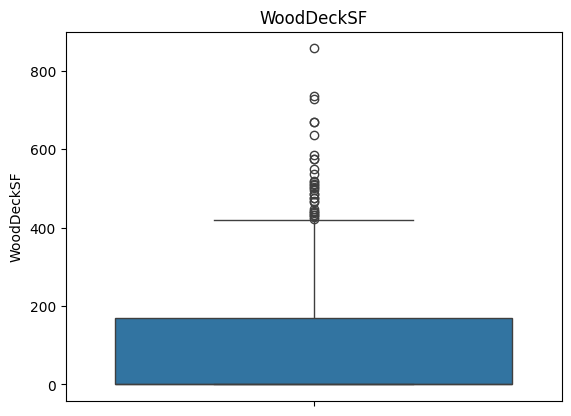

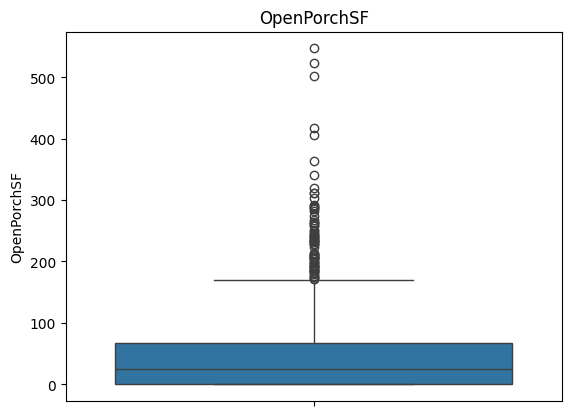

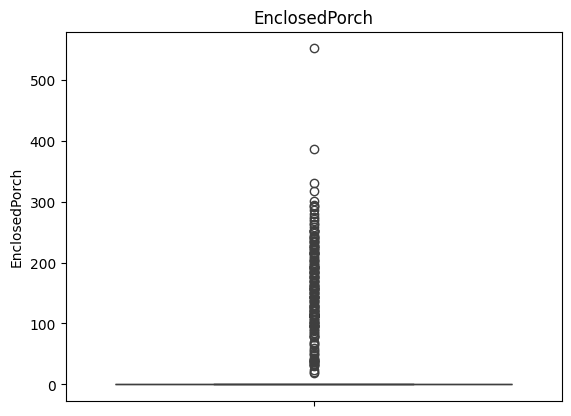

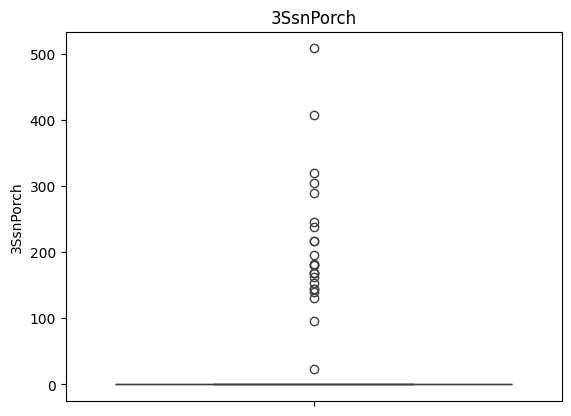

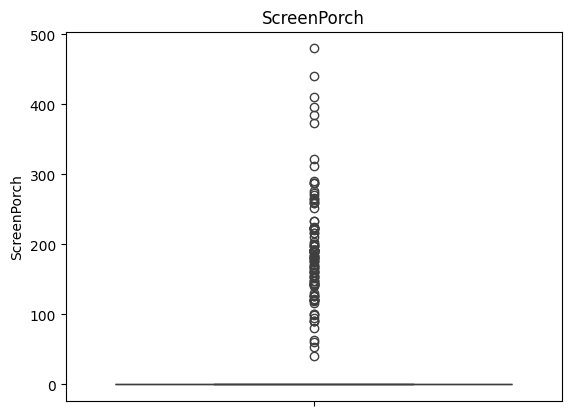

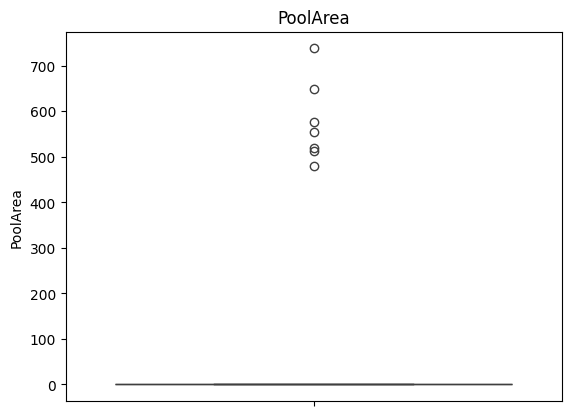

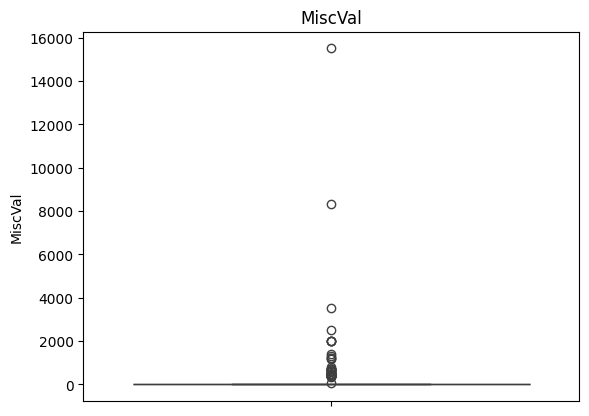

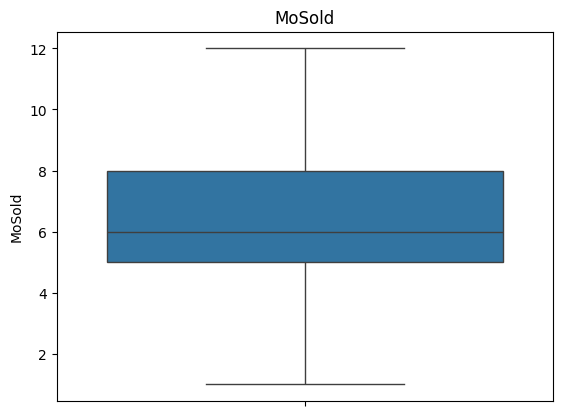

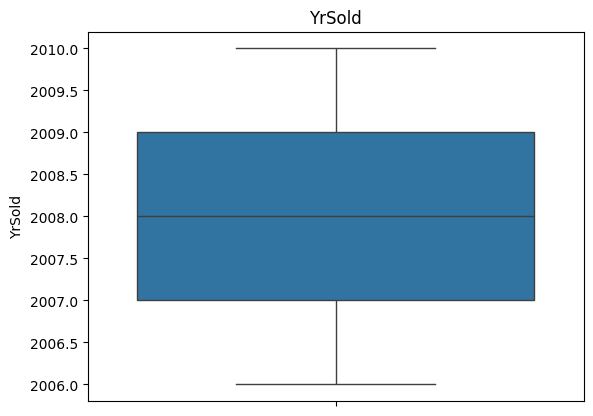

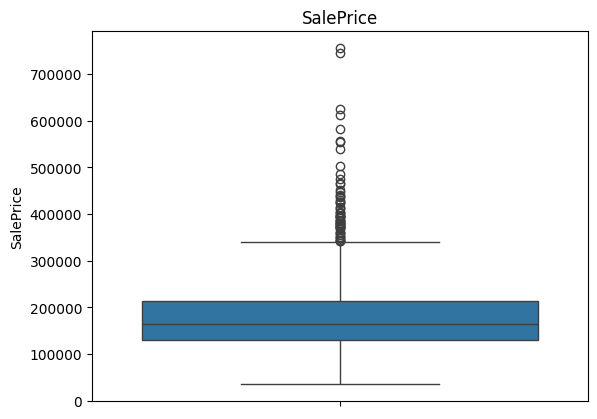

In [17]:
for i in df_n.columns:
    plt.title(i)
    sns.boxplot(df_n[i])
    plt.show()

In [18]:
df_n_d = df_n.filter(["BsmtFullBath","BsmtHalfBath","FullBath","HalfBath","BedroomAbvGr","KitchenAbvGr","TotRmsAbvGrd","Fireplaces","GarageCars","MoSold","OverallQual","OverallCond"],axis=1)
df_n_d

,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageCars,MoSold,OverallQual,OverallCond
0,1,0,2,1,3,1,8,0,2,2,7,5
1,0,1,2,0,3,1,6,1,2,5,6,8
2,1,0,2,1,3,1,6,1,2,9,7,5
3,1,0,1,0,3,1,7,1,3,2,7,5
4,1,0,2,1,4,1,9,1,3,12,8,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1455,0,0,2,1,3,1,7,1,2,8,6,5
1456,1,0,2,0,3,1,7,2,2,2,6,6
1457,0,0,2,0,4,1,9,2,1,5,7,9
1458,1,0,1,0,2,1,5,0,1,4,5,6


In [19]:
df_nn = df_n.filter(["BsmtFinSF2","LowQualFinSF","MiscVal","PoolArea","ScreenPorch","3SsnPorch","EnclosedPorch"],axis=1)
df_nn

,BsmtFinSF2,LowQualFinSF,MiscVal,PoolArea,ScreenPorch,3SsnPorch,EnclosedPorch
0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0
3,0,0,0,0,0,0,272
4,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...
1455,0,0,0,0,0,0,0
1456,163,0,0,0,0,0,0
1457,0,0,2500,0,0,0,0
1458,1029,0,0,0,0,0,112


In [20]:
df_n.drop(["BsmtFullBath","BsmtHalfBath","FullBath","HalfBath","BedroomAbvGr","KitchenAbvGr","TotRmsAbvGrd","Fireplaces","GarageCars","MoSold","OverallQual","OverallCond","BsmtFinSF2","LowQualFinSF","MiscVal","PoolArea","ScreenPorch","3SsnPorch","EnclosedPorch"],axis=1,inplace=True)

In [21]:
df_n

,MSSubClass,LotFrontage,LotArea,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,GrLivArea,GarageYrBlt,GarageArea,WoodDeckSF,OpenPorchSF,YrSold,SalePrice
0,60,65.0,8450,2003,2003,196.0,706,150,856,856,854,1710,2003.0,548,0,61,2008,208500
1,20,80.0,9600,1976,1976,0.0,978,284,1262,1262,0,1262,1976.0,460,298,0,2007,181500
2,60,68.0,11250,2001,2002,162.0,486,434,920,920,866,1786,2001.0,608,0,42,2008,223500
3,70,60.0,9550,1915,1970,0.0,216,540,756,961,756,1717,1998.0,642,0,35,2006,140000
4,60,84.0,14260,2000,2000,350.0,655,490,1145,1145,1053,2198,2000.0,836,192,84,2008,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,60,62.0,7917,1999,2000,0.0,0,953,953,953,694,1647,1999.0,460,0,40,2007,175000
1456,20,85.0,13175,1978,1988,119.0,790,589,1542,2073,0,2073,1978.0,500,349,0,2010,210000
1457,70,66.0,9042,1941,2006,0.0,275,877,1152,1188,1152,2340,1941.0,252,0,60,2010,266500
1458,20,68.0,9717,1950,1996,0.0,49,0,1078,1078,0,1078,1950.0,240,366,0,2010,142125


In [22]:
df_n.isnull().sum().sum()

0

# Using IQR to handle outliers

In [23]:
def wisker(col):
  q1=df_n[col].quantile(0.25)
  q3=df_n[col].quantile(0.75)
  iqr=q3-q1
  lower=q1-(1.5*iqr)
  upper=q3+(1.5*iqr)
  return lower,upper

In [24]:
for i in df_n.columns:
  lower,upper=wisker(i)
  df_n[i]=np.where(df_n[i]<lower,lower,df_n[i])
  df_n[i]=np.where(df_n[i]>upper,upper,df_n[i])

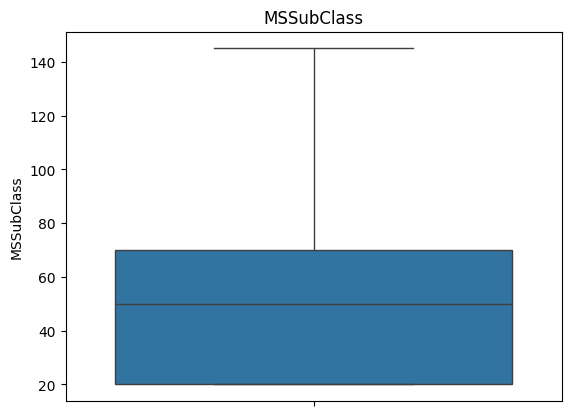

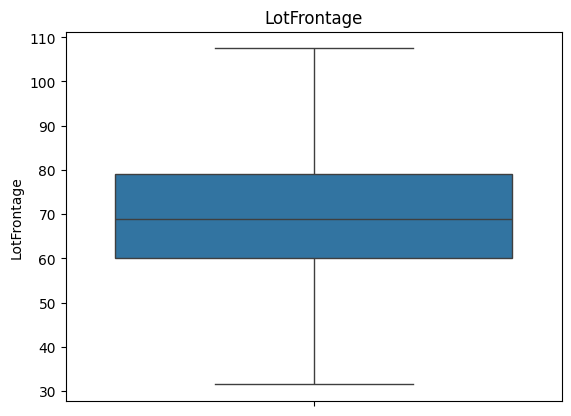

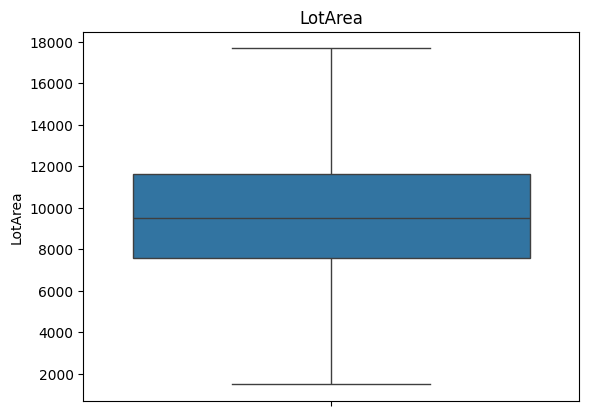

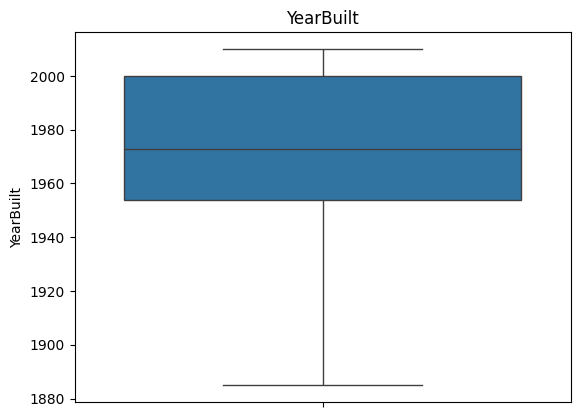

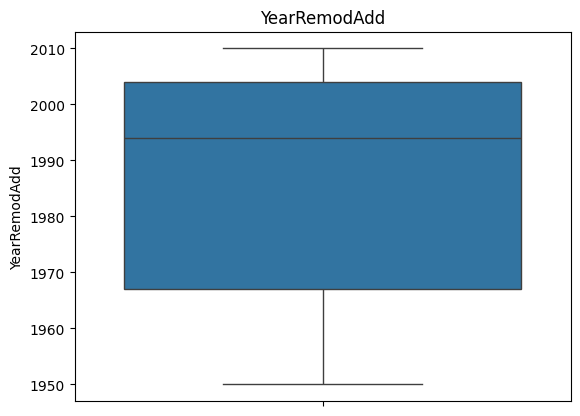

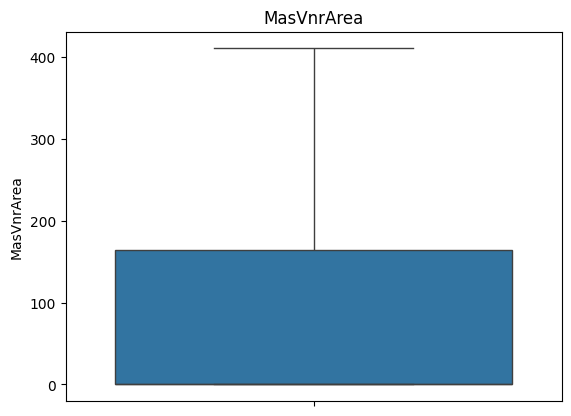

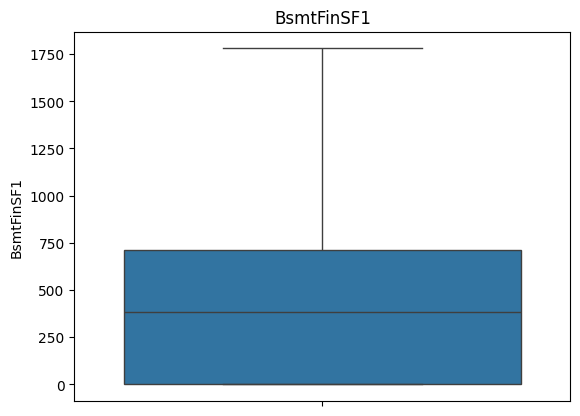

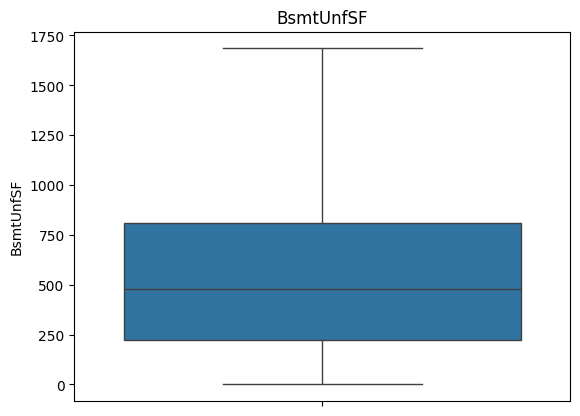

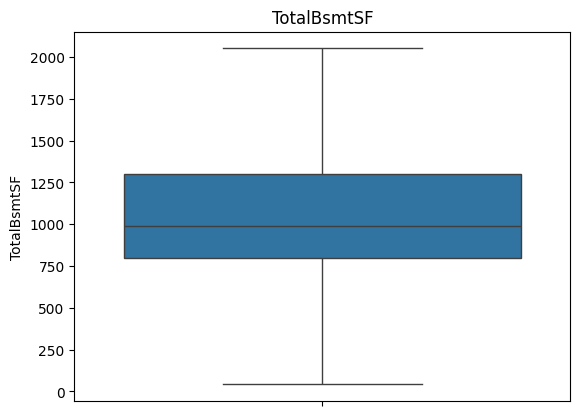

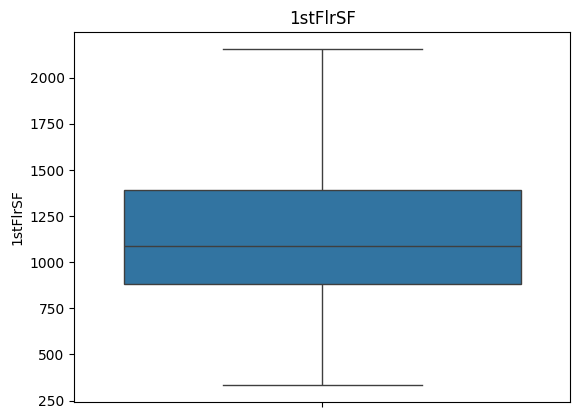

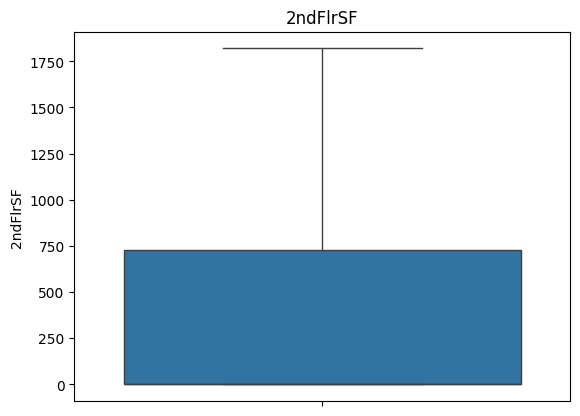

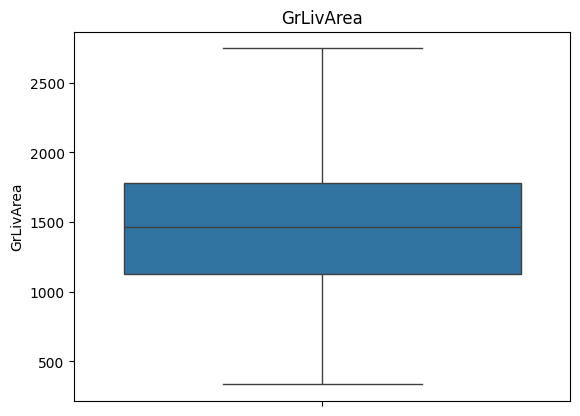

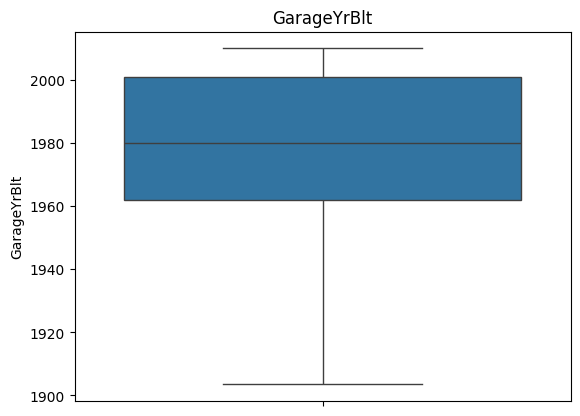

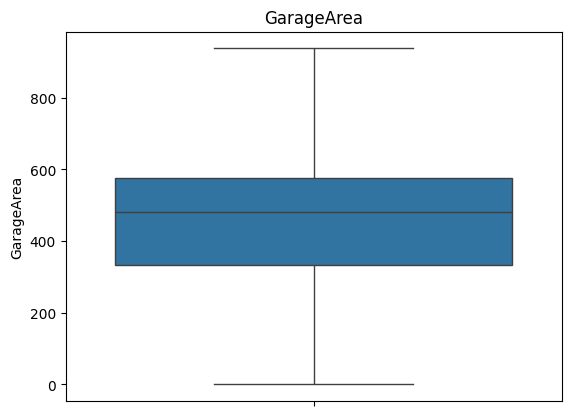

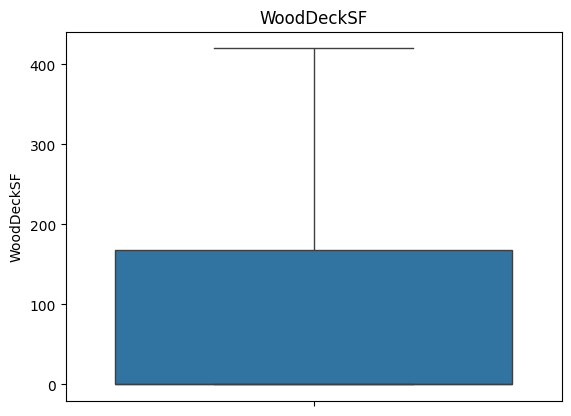

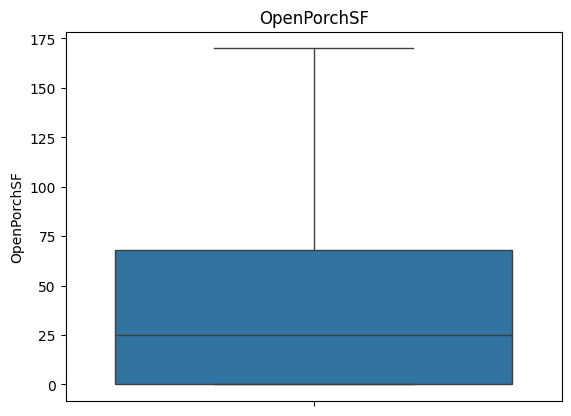

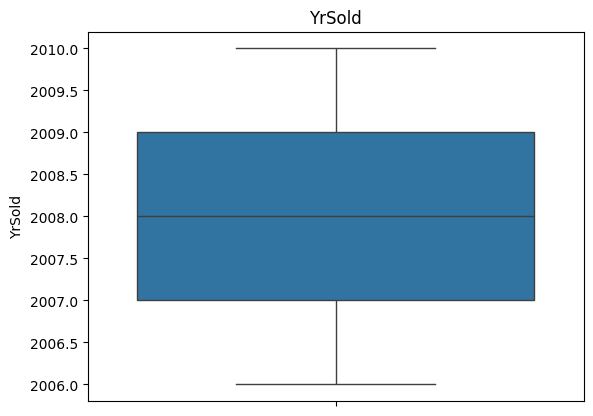

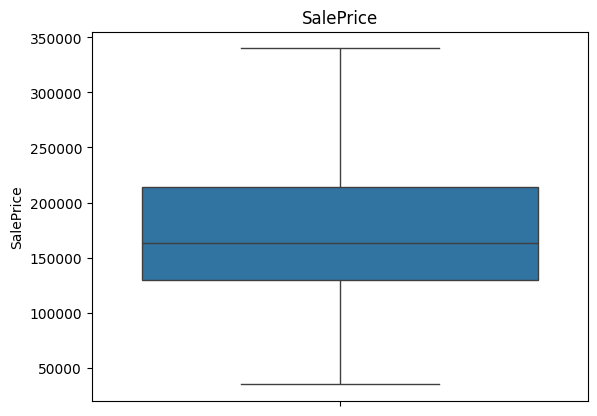

In [25]:
for i in df_n.columns:
    plt.title(i)
    sns.boxplot(df_n[i])
    plt.show()

In [26]:
df_n1 = pd.concat([df_n,df_nn],axis=1)
df_n1

,MSSubClass,LotFrontage,LotArea,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtUnfSF,TotalBsmtSF,1stFlrSF,...,OpenPorchSF,YrSold,SalePrice,BsmtFinSF2,LowQualFinSF,MiscVal,PoolArea,ScreenPorch,3SsnPorch,EnclosedPorch
0,60.0,65.0,8450.0,2003.0,2003.0,196.0,706.0,150.0,856.0,856.0,...,61.0,2008.0,208500.0,0,0,0,0,0,0,0
1,20.0,80.0,9600.0,1976.0,1976.0,0.0,978.0,284.0,1262.0,1262.0,...,0.0,2007.0,181500.0,0,0,0,0,0,0,0
2,60.0,68.0,11250.0,2001.0,2002.0,162.0,486.0,434.0,920.0,920.0,...,42.0,2008.0,223500.0,0,0,0,0,0,0,0
3,70.0,60.0,9550.0,1915.0,1970.0,0.0,216.0,540.0,756.0,961.0,...,35.0,2006.0,140000.0,0,0,0,0,0,0,272
4,60.0,84.0,14260.0,2000.0,2000.0,350.0,655.0,490.0,1145.0,1145.0,...,84.0,2008.0,250000.0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,60.0,62.0,7917.0,1999.0,2000.0,0.0,0.0,953.0,953.0,953.0,...,40.0,2007.0,175000.0,0,0,0,0,0,0,0
1456,20.0,85.0,13175.0,1978.0,1988.0,119.0,790.0,589.0,1542.0,2073.0,...,0.0,2010.0,210000.0,163,0,0,0,0,0,0
1457,70.0,66.0,9042.0,1941.0,2006.0,0.0,275.0,877.0,1152.0,1188.0,...,60.0,2010.0,266500.0,0,0,2500,0,0,0,0
1458,20.0,68.0,9717.0,1950.0,1996.0,0.0,49.0,0.0,1078.0,1078.0,...,0.0,2010.0,142125.0,1029,0,0,0,0,0,112


In [27]:
df_n1.drop("SalePrice",axis=1,inplace=True)

In [28]:
df_n1

,MSSubClass,LotFrontage,LotArea,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtUnfSF,TotalBsmtSF,1stFlrSF,...,WoodDeckSF,OpenPorchSF,YrSold,BsmtFinSF2,LowQualFinSF,MiscVal,PoolArea,ScreenPorch,3SsnPorch,EnclosedPorch
0,60.0,65.0,8450.0,2003.0,2003.0,196.0,706.0,150.0,856.0,856.0,...,0.0,61.0,2008.0,0,0,0,0,0,0,0
1,20.0,80.0,9600.0,1976.0,1976.0,0.0,978.0,284.0,1262.0,1262.0,...,298.0,0.0,2007.0,0,0,0,0,0,0,0
2,60.0,68.0,11250.0,2001.0,2002.0,162.0,486.0,434.0,920.0,920.0,...,0.0,42.0,2008.0,0,0,0,0,0,0,0
3,70.0,60.0,9550.0,1915.0,1970.0,0.0,216.0,540.0,756.0,961.0,...,0.0,35.0,2006.0,0,0,0,0,0,0,272
4,60.0,84.0,14260.0,2000.0,2000.0,350.0,655.0,490.0,1145.0,1145.0,...,192.0,84.0,2008.0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,60.0,62.0,7917.0,1999.0,2000.0,0.0,0.0,953.0,953.0,953.0,...,0.0,40.0,2007.0,0,0,0,0,0,0,0
1456,20.0,85.0,13175.0,1978.0,1988.0,119.0,790.0,589.0,1542.0,2073.0,...,349.0,0.0,2010.0,163,0,0,0,0,0,0
1457,70.0,66.0,9042.0,1941.0,2006.0,0.0,275.0,877.0,1152.0,1188.0,...,0.0,60.0,2010.0,0,0,2500,0,0,0,0
1458,20.0,68.0,9717.0,1950.0,1996.0,0.0,49.0,0.0,1078.0,1078.0,...,366.0,0.0,2010.0,1029,0,0,0,0,0,112


In [29]:
df_n_d

,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageCars,MoSold,OverallQual,OverallCond
0,1,0,2,1,3,1,8,0,2,2,7,5
1,0,1,2,0,3,1,6,1,2,5,6,8
2,1,0,2,1,3,1,6,1,2,9,7,5
3,1,0,1,0,3,1,7,1,3,2,7,5
4,1,0,2,1,4,1,9,1,3,12,8,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1455,0,0,2,1,3,1,7,1,2,8,6,5
1456,1,0,2,0,3,1,7,2,2,2,6,6
1457,0,0,2,0,4,1,9,2,1,5,7,9
1458,1,0,1,0,2,1,5,0,1,4,5,6


# Using Normalization to bring all the features into same scale

In [30]:
MM = MinMaxScaler()
df_n1[df_n1.columns] = MM.fit_transform(df_n1)
df_n1

,MSSubClass,LotFrontage,LotArea,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtUnfSF,TotalBsmtSF,1stFlrSF,...,WoodDeckSF,OpenPorchSF,YrSold,BsmtFinSF2,LowQualFinSF,MiscVal,PoolArea,ScreenPorch,3SsnPorch,EnclosedPorch
0,0.32,0.440789,0.430367,0.944,0.883333,0.477321,0.396490,0.088994,0.404975,0.286636,...,0.000000,0.358824,0.50,0.000000,0.0,0.00000,0.0,0.0,0.0,0.000000
1,0.00,0.638158,0.501390,0.728,0.433333,0.000000,0.549245,0.168496,0.606965,0.509575,...,0.709524,0.000000,0.25,0.000000,0.0,0.00000,0.0,0.0,0.0,0.000000
2,0.32,0.480263,0.603292,0.928,0.866667,0.394521,0.272938,0.257490,0.436816,0.321779,...,0.000000,0.247059,0.50,0.000000,0.0,0.00000,0.0,0.0,0.0,0.000000
3,0.40,0.375000,0.498302,0.240,0.333333,0.000000,0.121306,0.320380,0.355224,0.344293,...,0.000000,0.205882,0.00,0.000000,0.0,0.00000,0.0,0.0,0.0,0.492754
4,0.32,0.690789,0.789186,0.920,0.833333,0.852359,0.367848,0.290715,0.548756,0.445329,...,0.457143,0.494118,0.50,0.000000,0.0,0.00000,0.0,0.0,0.0,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,0.32,0.401316,0.397449,0.912,0.833333,0.000000,0.000000,0.565411,0.453234,0.339900,...,0.000000,0.235294,0.25,0.000000,0.0,0.00000,0.0,0.0,0.0,0.000000
1456,0.00,0.703947,0.722178,0.744,0.633333,0.289802,0.443664,0.349451,0.746269,0.954904,...,0.830952,0.000000,1.00,0.110583,0.0,0.00000,0.0,0.0,0.0,0.000000
1457,0.40,0.453947,0.466928,0.448,0.933333,0.000000,0.154440,0.520320,0.552239,0.468941,...,0.000000,0.352941,1.00,0.000000,0.0,0.16129,0.0,0.0,0.0,0.000000
1458,0.00,0.480263,0.508615,0.520,0.766667,0.000000,0.027518,0.000000,0.515423,0.408539,...,0.871429,0.000000,1.00,0.698100,0.0,0.00000,0.0,0.0,0.0,0.202899


In [31]:
df_c

,MSZoning,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,...,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,PoolQC,Fence,MiscFeature,SaleType,SaleCondition
0,RL,Pave,Grvl,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,...,Attchd,RFn,TA,TA,Y,Gd,MnPrv,Shed,WD,Normal
1,RL,Pave,Grvl,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,...,Attchd,RFn,TA,TA,Y,Gd,MnPrv,Shed,WD,Normal
2,RL,Pave,Grvl,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,...,Attchd,RFn,TA,TA,Y,Gd,MnPrv,Shed,WD,Normal
3,RL,Pave,Grvl,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,...,Detchd,Unf,TA,TA,Y,Gd,MnPrv,Shed,WD,Abnorml
4,RL,Pave,Grvl,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,...,Attchd,RFn,TA,TA,Y,Gd,MnPrv,Shed,WD,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,RL,Pave,Grvl,Reg,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,...,Attchd,RFn,TA,TA,Y,Gd,MnPrv,Shed,WD,Normal
1456,RL,Pave,Grvl,Reg,Lvl,AllPub,Inside,Gtl,NWAmes,Norm,...,Attchd,Unf,TA,TA,Y,Gd,MnPrv,Shed,WD,Normal
1457,RL,Pave,Grvl,Reg,Lvl,AllPub,Inside,Gtl,Crawfor,Norm,...,Attchd,RFn,TA,TA,Y,Gd,GdPrv,Shed,WD,Normal
1458,RL,Pave,Grvl,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,...,Attchd,Unf,TA,TA,Y,Gd,MnPrv,Shed,WD,Normal


# Handling categorical variables and coverting them into numbers using get dummies

In [32]:
df_c = pd.get_dummies(df_c,drop_first=True)
df_c

,MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,Street_Pave,Alley_Pave,LotShape_IR2,LotShape_IR3,LotShape_Reg,LandContour_HLS,...,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,False,False,True,False,True,False,False,False,True,False,...,False,False,False,False,True,False,False,False,True,False
1,False,False,True,False,True,False,False,False,True,False,...,False,False,False,False,True,False,False,False,True,False
2,False,False,True,False,True,False,False,False,False,False,...,False,False,False,False,True,False,False,False,True,False
3,False,False,True,False,True,False,False,False,False,False,...,False,False,False,False,True,False,False,False,False,False
4,False,False,True,False,True,False,False,False,False,False,...,False,False,False,False,True,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,False,False,True,False,True,False,False,False,True,False,...,False,False,False,False,True,False,False,False,True,False
1456,False,False,True,False,True,False,False,False,True,False,...,False,False,False,False,True,False,False,False,True,False
1457,False,False,True,False,True,False,False,False,True,False,...,False,False,False,False,True,False,False,False,True,False
1458,False,False,True,False,True,False,False,False,True,False,...,False,False,False,False,True,False,False,False,True,False


In [33]:
df_n_d

,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageCars,MoSold,OverallQual,OverallCond
0,1,0,2,1,3,1,8,0,2,2,7,5
1,0,1,2,0,3,1,6,1,2,5,6,8
2,1,0,2,1,3,1,6,1,2,9,7,5
3,1,0,1,0,3,1,7,1,3,2,7,5
4,1,0,2,1,4,1,9,1,3,12,8,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1455,0,0,2,1,3,1,7,1,2,8,6,5
1456,1,0,2,0,3,1,7,2,2,2,6,6
1457,0,0,2,0,4,1,9,2,1,5,7,9
1458,1,0,1,0,2,1,5,0,1,4,5,6


In [34]:
df_f =  pd.concat([df_n1,df_n_d,df_c],axis=1)


# Splitting the data in to X and Y

In [35]:
X = df_f.copy()
X

,MSSubClass,LotFrontage,LotArea,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtUnfSF,TotalBsmtSF,1stFlrSF,...,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,0.32,0.440789,0.430367,0.944,0.883333,0.477321,0.396490,0.088994,0.404975,0.286636,...,False,False,False,False,True,False,False,False,True,False
1,0.00,0.638158,0.501390,0.728,0.433333,0.000000,0.549245,0.168496,0.606965,0.509575,...,False,False,False,False,True,False,False,False,True,False
2,0.32,0.480263,0.603292,0.928,0.866667,0.394521,0.272938,0.257490,0.436816,0.321779,...,False,False,False,False,True,False,False,False,True,False
3,0.40,0.375000,0.498302,0.240,0.333333,0.000000,0.121306,0.320380,0.355224,0.344293,...,False,False,False,False,True,False,False,False,False,False
4,0.32,0.690789,0.789186,0.920,0.833333,0.852359,0.367848,0.290715,0.548756,0.445329,...,False,False,False,False,True,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,0.32,0.401316,0.397449,0.912,0.833333,0.000000,0.000000,0.565411,0.453234,0.339900,...,False,False,False,False,True,False,False,False,True,False
1456,0.00,0.703947,0.722178,0.744,0.633333,0.289802,0.443664,0.349451,0.746269,0.954904,...,False,False,False,False,True,False,False,False,True,False
1457,0.40,0.453947,0.466928,0.448,0.933333,0.000000,0.154440,0.520320,0.552239,0.468941,...,False,False,False,False,True,False,False,False,True,False
1458,0.00,0.480263,0.508615,0.520,0.766667,0.000000,0.027518,0.000000,0.515423,0.408539,...,False,False,False,False,True,False,False,False,True,False


In [36]:
Y = df["SalePrice"]
Y

0       208500
1       181500
2       223500
3       140000
4       250000
         ...  
1455    175000
1456    210000
1457    266500
1458    142125
1459    147500
Name: SalePrice, Length: 1460, dtype: int64

In [37]:
X.isnull().sum().sum()

0

In [38]:
Y.isnull().sum().sum()

0

# Splitting the data in to Training and Test data

In [39]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=42)


# Performing PCA for all the features

Text(0, 0.5, 'cumulative explained variance')

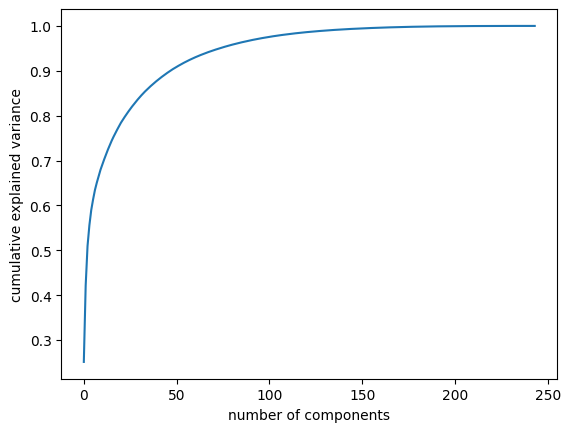

In [40]:
pca = PCA().fit(X_train)
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance')

# By looking into the above graph, we can see that for 100 components most of the variance is captured. We will choose 100 as no of components

In [41]:
pca = PCA(n_components=100)
pca.fit(X_train)

PCA(n_components=100)

In [42]:
X_train_pca = pca.transform(X_train)
X_test_pca = pca.transform(X_test)


# Building the models now

In [43]:
modellinear = LinearRegression()

# Train the model
modellinear.fit(X_train_pca, Y_train)

LinearRegression()

In [44]:
Y_pred_Training = modellinear.predict(X_train_pca)
Y_pred_Testing = modellinear.predict(X_test_pca)


In [45]:
mse_Training = mean_squared_error(Y_train, Y_pred_Training)
mse_Testing = mean_squared_error(Y_test, Y_pred_Testing)



# Calculate R-squared
r2_Training = r2_score(Y_train,Y_pred_Training)
r2_Testing = r2_score(Y_test,Y_pred_Testing)


print("MSE of Training data is",mse_Training)
print("R2 Score of Training data is",round(r2_Training,3))
print("MSE of Test data is",mse_Testing)
print("R2 Score of Test data is",round(r2_Testing,3))


# print(f'Mean Squared Error for Training data: {mse_Training}')
# print(f'R-squared value for Training data: {r2_Training}')

# print(f'Mean Squared Error for Testing data: {mse_Testing}')
# print(f'R-squared value for Testing data: {r2_Testing}')


MSE of Training data is 793071899.0568619
R2 Score of Training data is 0.868
MSE of Test data is 987029584.6599996
R2 Score of Test data is 0.859


In [46]:
ridge_model = Ridge(alpha=1.0)
ridge_model.fit(X_train_pca, Y_train)
Y_pred_Train = ridge_model.predict(X_train_pca)
mse_Train = mean_squared_error(Y_train, Y_pred_Train)
r2_Train_ridge = r2_score(Y_train, Y_pred_Train)
Y_pred_Test = ridge_model.predict(X_test_pca)
mse_Test = mean_squared_error(Y_test, Y_pred_Test)
r2_Test_ridge = r2_score(Y_test, Y_pred_Test)
print("MSE of Training data is",mse_Train)
print("R2 Score of Training data is",round(r2_Train_ridge,3))
print("MSE of Test data is",mse_Test)
print("R2 Score of Test data is",round(r2_Test_ridge,3))

MSE of Training data is 793311801.7276747
R2 Score of Training data is 0.868
MSE of Test data is 984589944.4351457
R2 Score of Test data is 0.859


In [47]:
lasso_model = Lasso(alpha=1.0)
lasso_model.fit(X_train_pca, Y_train)
Y_pred_Train = lasso_model.predict(X_train_pca)
mse_Train = mean_squared_error(Y_train, Y_pred_Train)
r2_Train_lasso = r2_score(Y_train, Y_pred_Train)
Y_pred_Test = lasso_model.predict(X_test_pca)
mse_Test = mean_squared_error(Y_test, Y_pred_Test)
r2_Test_lasso = r2_score(Y_test, Y_pred_Test)
print("MSE of Training data is",mse_Train)
print("R2 Score of Training data is",round(r2_Train_lasso,3))
print("MSE of Test data is",mse_Test)
print("R2 Score of Test data is",round(r2_Test_lasso,3))


MSE of Training data is 793073698.0841819
R2 Score of Training data is 0.868
MSE of Test data is 987046143.7994858
R2 Score of Test data is 0.859


In [48]:
RF = RandomForestRegressor(random_state=42,n_estimators=1000)
RF.fit(X_train_pca, Y_train)
Y_pred_Train=RF.predict(X_train_pca)
Y_pred_Test=RF.predict(X_test_pca)
r2_Train_RF = np.round(r2_score(Y_train,Y_pred_Train),3)
r2_Test_RF = np.round(r2_score(Y_test,Y_pred_Test),3)
print("MSE of Test data is : ",np.round(mean_squared_error(Y_test,Y_pred_Test),3))
print("R2 score of Test data is : ",np.round(r2_score(Y_test,Y_pred_Test),3))

MSE of Test data is :  1135304508.145
R2 score of Test data is :  0.837


In [49]:
modelgb = GradientBoostingRegressor(random_state=42,learning_rate=0.1,n_estimators=1000)
modelgb.fit(X_train_pca, Y_train)
Y_pred_Train=modelgb.predict(X_train_pca)
Y_pred_Test=modelgb.predict(X_test_pca)
r2_Train_GB = np.round(r2_score(Y_train,Y_pred_Train),3)
r2_Test_GB = np.round(r2_score(Y_test,Y_pred_Test),3)
print("MSE of Test data is : ",np.round(mean_squared_error(Y_test,Y_pred_Test),3))
print("R2 score of Test data is : ",np.round(r2_score(Y_test,Y_pred_Test),3))

MSE of Test data is :  880088246.371
R2 score of Test data is :  0.874


In [50]:
modelada = AdaBoostRegressor(random_state=42,learning_rate=0.1,n_estimators=1000,loss='linear')
modelada.fit(X_train_pca, Y_train)
Y_pred_Train=modelada.predict(X_train_pca)
Y_pred_Test=modelada.predict(X_test_pca)
r2_Train_ADA = np.round(r2_score(Y_train,Y_pred_Train),3)
r2_Test_ADA = np.round(r2_score(Y_test,Y_pred_Test),3)
print("MSE of Test data is : ",np.round(mean_squared_error(Y_test,Y_pred_Test),3))
print("R2 score of Test data is : ",np.round(r2_score(Y_test,Y_pred_Test),3))

MSE of Test data is :  1280098117.782
R2 score of Test data is :  0.817


# Preparing dataframe with all the prepared models along with their training and testing r2 scores

In [51]:
data = {
    'Models': ['modellinear','ridge_model','lasso_model','RF','modelgb','modelada'],
    'TrainingR2Score': [r2_Training,r2_Train_ridge,r2_Train_lasso,r2_Train_RF,r2_Train_GB,r2_Train_ADA],
    'TestingR2Score': [r2_Testing,r2_Test_ridge,r2_Test_lasso,r2_Test_RF,r2_Test_GB,r2_Test_ADA]

}

# Convert the dictionary to a DataFrame
dfdata = pd.DataFrame(data)
dfdata_sorted = dfdata.sort_values(by='TestingR2Score', ascending=False)
print(dfdata_sorted)

        Models  TrainingR2Score  TestingR2Score
4      modelgb         1.000000        0.874000
1  ridge_model         0.868189        0.858903
0  modellinear         0.868229        0.858553
2  lasso_model         0.868229        0.858551
3           RF         0.967000        0.837000
5     modelada         0.852000        0.817000


# Gradient Boosting has given highest Testing r2score when used PCA